# References

- Murphy KP. Probabilistic machine learning: Advanced topics. MIT press; 2023 Aug 15.
- Bishop CM, Bishop H. Deep learning: Foundations and concepts. Springer Nature; 2023 Nov 1.
- https://pyro.ai
- https://www.cs.cmu.edu/~epxing/Class/10708-20/index.html
- Chandra R, Simmons J. Bayesian neural networks via MCMC: a Python-based tutorial. IEEE Access. 2024 May 15.
- https://www.youtube.com/playlist?list=PLJ71tqAZr196GJ5G36s64xifr1tURUCSJ

# Outline

- Introduction
- Exact inference
- Approximate inference
    - Monte carlo (MC) approximation
    - Markov chain Monte carlo (MCMC)
    - Variational inference (VI)
- Bayesian Neural network (BNN)
    - Monte carlo dropout
    - BNN with MCMC
    - BNN with VI
- Probabilistic programming tools


# Probabilistic inferences

# Introduction

In machine learning, when we deal with uncertainty (like future predictions, hidden information, or model settings), we use probabilities. We treat these uncertain things as a probability distribution.

***Inference*** is the process of computing the posterior distribution for these quantity conditioning on the data.

We can show from Bayes rule:


$$p(\theta | \mathcal{D}) = \frac{p(\theta)p(\mathcal{D}|\theta)}{p(\mathcal{D})}$$
$\theta$ is model parameters which is not known. $\mathcal{D}$ represent data which is known.

The main computational bottleneck is the denominator which required to solved the following high dimensional integral (**HARD**).

> $$p(\mathcal{D}) = \int p(\mathcal{D}|\theta)p(\theta)d \theta$$


> $$p(\mathcal{D}) = \int_{\theta_1} \int_{\theta_2} \int_{\theta_3} ... \ p(\mathcal{D}|\theta)p(\theta)d \theta_1 d \theta_2d \theta_3 \ ...$$


## Type of inferences

#### Exact Inference
- Computing the exact posterior distribution using Bayes' rule.
- Analytical solutions

**Challenges**:
- Often intractable for complex models.
- Requires computing the marginal likelihood , which may involve high-dimensional integrals (**HARD**).

#### Approximate Inference
- Estimating the posterior distribution when exact inference is computationally infeasible.

**Challenges**:
- may introduce approximation errors.
- computationally expensive

# Exact inference


**Example algorithms**
- Brute-force
- Elimination algorithm

# Approximate inference


**Example algorithms**

- Monte carlo (MC)(sampling) approximation: Use sampling to approximate the probabilistic distribution.
- Markov chain Monte carlo (MCMC) approximation: Similar concept to MC approximation, but integrated by Markov chain when sampling.
- Variational inference (VI): VI try to approximate the distribution using analtic solution. However, VI try to relaxing the intractiable optimization problem.


## Monte carlo approximation

Monte Carlo approximation is a statistical method used to estimate numerical results through random sampling. 
It is widely used in various fields like finance, physics, and data science.

Mathematically, the Monte Carlo method relies on the Law of Large Numbers, which states that the average of results 
obtained from a large number of trials approaches the expected value as the number of trials increases.


The expectation of a function $f(z)$ with respect to a probability distribution $p(z)$ is given by:

$$
E[f] = \int f(z)p(z) dz
$$

If $z$ is a discrete random variable, the integral is replaced by a summation. In practice, if direct computation of 
this expectation is infeasible, we can approximate it using Monte Carlo sampling. By drawing $L$ samples $z^{(l)}$
from $p(z)$, the expectation can be approximated as:

$$
E[f] \approx \frac{1}{L} \sum_{l=1}^L f(z^{(l)})
$$

This approximation is an unbiased estimator of the true expectation.

### Example: Approximating the Expectation

Approximates the expectation of $$f(z) = z^2$$ for z ~ Uniform(0, 1).

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def expectation_example(num_samples):

    # Generate random samples from Uniform(0, 1)
    samples = np.random.uniform(0, 1, num_samples)
    # Compute f(z) = z^2 for each sample
    f_values = samples**2
    # Calculate the mean of f(z) values
    expectation = np.mean(f_values)
    return expectation

# Number of samples for expectation approximation
num_samples = 100_000
# Call the expectation function
estimated_expectation = expectation_example(num_samples)
actual_expectation = 1/3  # The exact expectation of z^2 under Uniform(0, 1)

print(f"Monte Carlo estimate of E[z^2] (using {num_samples} samples): {estimated_expectation}")
print(f"Actual value of E[z^2]: {actual_expectation}")

Monte Carlo estimate of E[z^2] (using 100000 samples): 0.33422933419422596
Actual value of E[z^2]: 0.3333333333333333


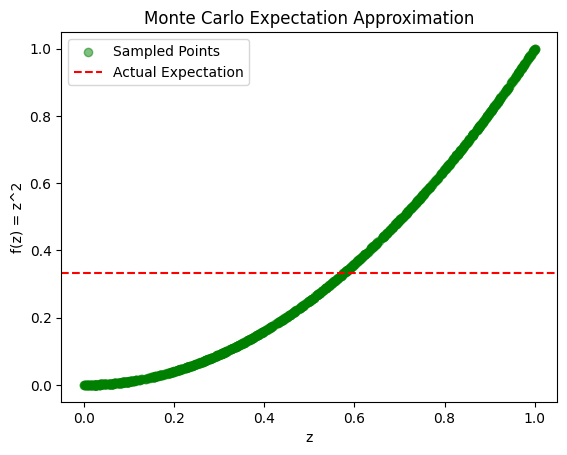

In [10]:
# Visualizing the expectation
samples = np.random.uniform(0, 1, 1_000)
f_values = samples**2

plt.figure()
# Scatter plot of sampled points
plt.scatter(samples, f_values, color='green', alpha=0.5, label='Sampled Points')
# Plot the actual expectation line
plt.axhline(actual_expectation, color='red', linestyle='--', label='Actual Expectation')
plt.title('Monte Carlo Expectation Approximation')
plt.xlabel('z')
plt.ylabel('f(z) = z^2')
plt.legend()
plt.show()

![](images/ex1.png)

### Estimating Pi using Monte Carlo Simulation

To estimate Pi, we consider a unit circle inscribed in a square of side length 2. The area of the circle is $\pi r^2$,
and the area of the square is $4r^2$. Since $r = 1$, the ratio of the area of the circle to the square is $\pi/4$.
By randomly sampling points within the square and counting how many fall inside the circle, we can approximate $\pi$.


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_pi(num_points):
    inside_circle = 0
    x_inside, y_inside = [], []
    x_outside, y_outside = [], []

    for _ in range(num_points):
        # Generate random (x, y) point within [-1, 1] x [-1, 1]
        x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
        # Check if point lies within the unit circle
        if x**2 + y**2 <= 1: # inside circle
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)
        else: # outside circle
            x_outside.append(x)
            y_outside.append(y)
            
    # Estimate Pi using the ratio of points inside the circle to total points
    pi_estimate = (inside_circle / num_points) * 4
    return pi_estimate, x_inside, y_inside, x_outside, y_outside

num_points = 10_000
pi_estimate, x_inside, y_inside, x_outside, y_outside = estimate_pi(num_points)

print(f"Monte Carlo estimate of Pi (using {num_points} points): {pi_estimate}")

Monte Carlo estimate of Pi (using 10000 points): 3.1352


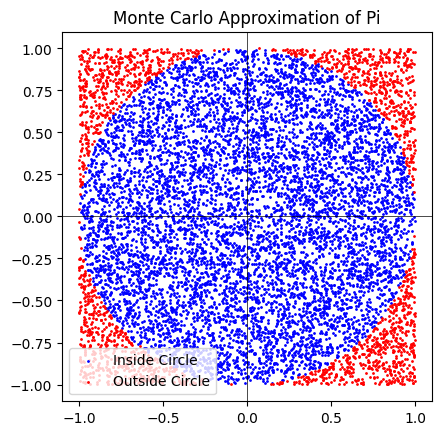

In [6]:
# Plotting
plt.figure()
# Plot points inside the circle
plt.scatter(x_inside, y_inside, color='blue', s=1, label='Inside Circle')
# Plot points outside the circle
plt.scatter(x_outside, y_outside, color='red', s=1, label='Outside Circle')
plt.gca().set_aspect('equal', adjustable='box')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.title('Monte Carlo Approximation of Pi')
plt.legend()
plt.show()

### Importance Sampling
Importance sampling is a Monte Carlo method used to approximate integrals of the form:

$$
E[f(x)] = \int f(x) p(x) dx,
$$

where $f(x)$ is the target function, and $p(x)$ is the target distribution (often a conditional distribution).

Instead of sampling directly from $p(x)$ (which might be challenging), we sample from a simpler proposal distribution $q(x)$.

$$
\int f(x) p(x) dx = \int f(x) \frac{p(x)}{q(x)} q(x) dx,
$$

To adjust for the difference between $p(x)$ and $q(x)$, we associate weights with each sample, resulting in the weighted Monte Carlo approximation:

$$
E[f(x)] \approx \frac{1}{N} \sum_{n=1}^N w_n f(x_n),
$$

where the importance weights are defined as:

$$
w_n = \frac{p(x_n)}{q(x_n)}.
$$

This approach requires that $q(x) > 0$ wherever $p(x) > 0$.

![images/import.png](images/import.png)


In cases where the target distribution $p(x)$ is unnormalized, we use self-normalized importance sampling. 
This method estimates the expectation as a ratio of weighted sums, avoiding the need for the normalization constant $Z=\int \tilde{p}(x) dx$.

This can be derived from:

$$
E[f(x)] = \frac{\int f(x) \tilde{p}(x) dx}{\int \tilde{p}(x) dx} = \frac{\int f(x) \frac{\tilde{p}(x)}{q(x)} q(x) dx}{\int \frac{\tilde{p}(x)}{q(x)} dx} \approx \frac{\sum_{n=1}^N \tilde{w}_n f(x_n)}{\sum_{n=1}^N \tilde{w}_n},
$$

The expectation is approximated as:

$$
E[f(x)] \approx \frac{\sum_{n=1}^N \tilde{w}_n f(x_n)}{\sum_{n=1}^N \tilde{w}_n},
$$

where the unnormalized weights are defined as:

$$
\tilde{w}_n = \frac{\tilde{p}(x_n)}{q(x_n)}.
$$


This approach ensures that the estimate does not depend on the normalization constant of $p(x)$.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def self_normalized_importance_sampling(f, unnormalized_p, q, q_sample, num_samples):

    # Draw samples from the proposal distribution
    samples = q_sample(num_samples)
    # Compute unnormalized weights
    unnormalized_weights = unnormalized_p(samples) / q(samples)
    # Normalize the weights
    normalized_weights = unnormalized_weights / np.sum(unnormalized_weights)
    # Compute the weighted expectation
    expectation = np.sum(normalized_weights * f(samples))
    return expectation, normalized_weights, samples

# Define unnormalized target and proposal distributions
unnormalized_p = lambda x: np.exp(-x**2 / 2)  # Unnormalized standard normal distribution
q = lambda x: np.exp(-x) * (x >= 0)  # Exponential distribution with lambda=1
q_sample = lambda n: np.random.exponential(1, n)  # Sampling from the exponential distribution
f = lambda x: x**2  # Function to compute expectation

# Number of samples
num_samples = 10_000

# Perform self-normalized importance sampling
estimated_expectation, normalized_weights, samples = self_normalized_importance_sampling(f, unnormalized_p, q, q_sample, num_samples)

# Analytical expectation of x^2 under standard normal
actual_expectation = 1  # Variance of standard normal distribution

print(f"Estimated expectation using self-normalized importance sampling: {estimated_expectation}")
print(f"Actual expectation: {actual_expectation}")

Estimated expectation using self-normalized importance sampling: 1.0047513959463334
Actual expectation: 1


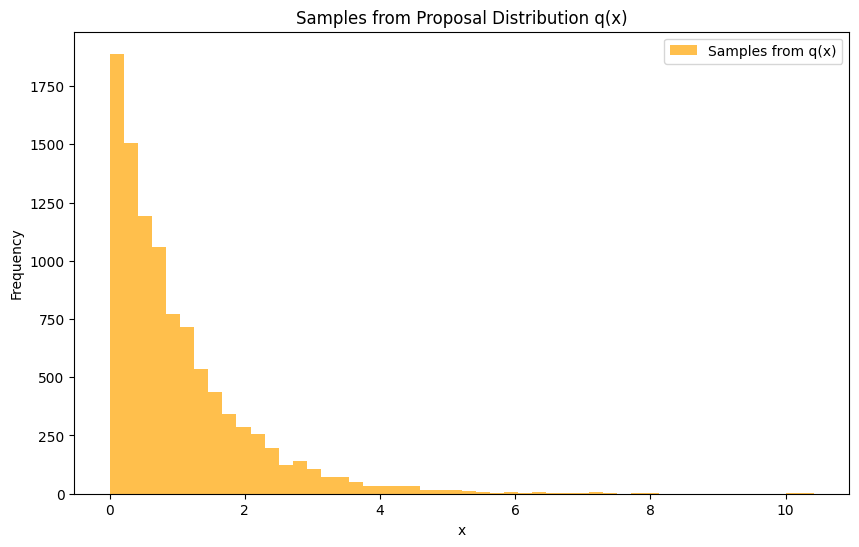

: 

In [ ]:


# Visualizing the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=50, color='orange', alpha=0.7, label='Samples from q(x)')
plt.title('Samples from Proposal Distribution q(x)')
plt.xlabel('x')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Markov chain Monte carlo (MCMC)

Introduction to MCMC:
Markov Chain Monte Carlo (MCMC) methods are a class of algorithms used to sample from high-dimensional probability distributions.
Unlike non-iterative methods like MC such as importance sampling, MCMC constructs a Markov chain whose stationary
distribution is the target distribution $p(x) = \frac{\tilde{p}(x)}{Z_p}$, $Z_p$ may be unknown. By performing a random walk on the state space, the algorithm generates samples that can be used for Monte Carlo integration.

Key concepts in MCMC:
- Mixing time or Burn-in time: The time it takes for the Markov chain to reach its stationary distribution, the target distribution $p(x)$ that we aim to sample from.
- Correlated samples: Unlike independent samples in other methods, MCMC produces dependent samples. Each sample depends on the previous one, introducing a "memory" into the process.

![mcmc1.png](images/mcmc1.png)

Dong T, An D, Kim NH. Prognostics 102: efficient Bayesian-based prognostics algorithm in Matlab. Fault Detection, Diagnosis and Prognosis. 2019 Feb 20:5-25.

#### MCMC vs MC

https://www.youtube.com/watch?v=OTO1DygELpY

**Advantages:**

- MCMC can handle high-dimensional target distributions where traditional Monte Carlo methods struggle.

**Disadvantages:**
- MCMC samples are correlated, leading to a need for more samples to reduce variance.
- Requires careful tuning of the proposal distribution for efficiency.

Imagine you want to estimate the average height of people in a large city.

MC: You randomly select people from the city and measure their height. This is analogous to standard MC, where you directly sample from the population. Sometime you get the city that have low population, you may get less sample.

MCMC: You start with a random person and then "walk" around the city, the person will suggest you the next person you want to sample.


### Metropolis-Hastings Algorithm

The Metropolis-Hastings Algorithm:
The Metropolis-Hastings (MH) algorithm is one of the simplest and most widely used MCMC methods. It generates samples by 
iteratively proposing a new state $x'$ based on the current state $x$ and accepting or rejecting it based on the acceptance probability.

> **_NOTE:_** Key steps in the MH algorithm: 
> 1. Propose a new state $x'$ from a proposal distribution $q(x'|x)$.
> 2. Compute the acceptance probability $A$:
>   - If $q(x'|x)$ is symmetric ($q(x|x')=q(x'|x)$):
>      $$
>       A = \min \left( 1, \frac{\tilde{p}(x')}{\tilde{p}(x)} \right)
>      $$
>    - If $q(x'|x)$ is asymmetric:
>      $$
>      A = \min \left( 1, \frac{\tilde{p}(x') q(x|x')}{\tilde{p}(x) q(x'|x)} \right)
>      $$
> 3. Accept or reject the proposal:
>    - Accept $x'$ with probability $A$.
>    - Otherwise, stay at the current state $x$.

https://www.youtube.com/watch?v=OTO1DygELpY

![images/mcmc.png](images/mcmc.png)

Jin SS, Ju H, Jung HJ. Adaptive Markov chain Monte Carlo algorithms for Bayesian inference: recent advances and comparative study. Structure and Infrastructure Engineering. 2019 Nov 2;15(11):1548-65.


Algorithm:
1. **Initialize:** Set $x_0$ to an arbitrary initial value.
2. **Iterate for $s = 1, 2, \dots$:**
    - Propose a new state $x' \sim q(x'|x_s)$.
    - Compute the acceptance probability:
      $$
      A = \min \left( 1, \frac{p(x') q(x_s|x')}{p(x_s) q(x'|x_s)} \right).
      $$
    - Draw a uniform random variable $u \sim U(0, 1)$.
    - If $u \leq A$, accept the proposal and set $x_{s+1} = x'$.
    - Otherwise, reject the proposal and set $x_{s+1} = x_s$.
3. **Output:** Return the sequence of samples $\{x_0, x_1, \dots, x_N\}$ after discarding burn-in samples.


## Variational inference (VI)

**Introduction to Variational Inference**:
- Goal: Approximate an intractable posterior distribution \( p(z|x) \) with a simpler variational distribution \( q(z) \).
- Key Idea: Transform Bayesian inference into an optimization problem by minimizing the Kullback-Leibler (KL) divergence:

  $$ q^* = \arg\min_{q \in Q} D_{KL}(q(z) || p(z|x)) $$

  https://www.youtube.com/watch?v=A9WmgK9qpm0&list=PLJ71tqAZr196GJ5G36s64xifr1tURUCSJ&index=1

![vi1.png](images/vi1.png)





### The Objective:
- The KL divergence is defined as:
  $$ D_{KL}(q(z) || p(z|x)) = \mathbb{E}_q [ \log \frac{q(z)}{p(z|x)} ] $$


- Expanding and rearranging terms gives the Evidence Lower Bound (ELBO):

$$\begin{split} 
D_{KL}(q(z) || p(z|x)) &= \mathbb{E}_q[\log q(z)] - \mathbb{E}_q[\log p(z|x)] \\
D_{KL}(q(z) || p(z|x)) &= \mathbb{E}_q[\log q(z)] - \mathbb{E}_q[\log p(x,z)] + \mathbb{E}_q[\log p(x)] \\
D_{KL}(q(z) || p(z|x)) &= \mathbb{E}_q[\log q(z)] - \mathbb{E}_q[\log p(x,z)] + \log p(x) \\
\underbrace{D_{KL}(q(z) || p(z|x)) - \log p(x)}_{-ELBO} &= \mathbb{E}_q[\log q(z)] - \mathbb{E}_q[\log p(x,z)]\\
\end{split}$$

$$ \text{ELBO}(q) = \mathbb{E}_q[\log p(x, z)] - \mathbb{E}_q[\log q(z)] $$

Rearange:

$$\begin{split} 
\text{ELBO}(q) &= \mathbb{E}_q[\log p(x| z)] + \mathbb{E}_q[\log p(z)] - \mathbb{E}_q[\log q(z)] \\
\text{ELBO}(q) &= \mathbb{E}_q[\log p(x| z)] + \mathbb{E}_q[\log \frac{p(z)}{q(z)}] \\
\text{ELBO}(q) &= \mathbb{E}_q[\log p(x| z)] - \mathbb{E}_q[\log \frac{q(z)}{p(z)}] \\
\text{ELBO}(q) &= \mathbb{E}_q[\log p(x| z)] - D_{KL}(q(z) || p(z)) \\
\end{split}$$


- Maximizing the ELBO is equivalent to minimizing the KL divergence.

### Form of the Variational Posterior:
Variational inference (VI) approximates the true posterior $ p(z|x) $ with a simpler distribution $ q(z) $. The choice of $ q(z) $ critically impacts the trade-off between accuracy and computational efficiency. Below, we expand on the options for $ q(z) $, including both classic and modern approaches.

#### Fixed-Form VI
Assume $q(z)$ belongs to a parametric family (e.g., Gaussian). Optimize its parameters via gradient-based methods.

**Example Choices**:

- **Gaussian:**
  $$ q(z) = N(z | \mu, \Sigma) $$
  where $\Sigma$ is a dense covariance matrix.
  - **Pros:** Matches exact posterior if true posterior is Gaussian.
  - **Cons:** $O(D^2)$ parameters (intractable for high-dimensional $z$).

- **Exponential Family Distributions:**
  Use conjugate distributions (e.g., Gamma, Beta) for specific likelihoods.
  - Example: For count data, $q(z) = \text{Gamma}(z | \alpha, \beta)$.

#### Free-Form VI (Mean-Field Approximation)
Assume $q(z)$ factorizes over groups of variables:

$$ q(z) = \prod_{j=1}^{J} q_j(z_j) $$

The optimal $q_j(z_j)$ is derived by maximizing the ELBO in a coordinate ascent manner.
- **Pros:** No need to assume a parametric form for $q_j(z_j)$.
- **Cons:** Independence assumptions may oversimplify posterior.

### Optimization Techniques:
- **Coordinate Ascent**: Update each $ q_i(z_i) $ while holding others fixed.
- **Gradient-Based Methods**: Use stochastic gradient descent (SGD) with automatic differentiation.


# Bayesian neural network (BNN)


**Traditional NNs**

- Point Estimates and Overconfidence: NNs predict point estimates, like class probabilities, without quantifying uncertainty.  This leads to overconfident predictions, even on ambiguous or out-of-distribution (OOD) data.

    - Example: A medical diagnosis model might predict "95% cancer" with high confidence, even when the input is ambiguous or OOD. This overconfidence can lead to misdiagnosis and inappropriate treatment.
    - Consequence: Poor reliability in high-stakes decisions, especially in domains like healthcare, finance, and autonomous driving where understanding uncertainty is crucial. Overconfident predictions can lead to catastrophic failures.

![image.png](images/uncer.png)

ref image: https://neurosciences.univ-grenoble-alpes.fr/en/news/uncertainty-quantification-deep-learning-based-medical-image-segmentation

- Sensitivity to Overfitting: NNs are prone to overfitting, especially with limited data.  They can memorize training data, including noise, leading to poor generalization on unseen data.

    - Consequence: Poor performance on real-world data and difficulty in deploying models to new environments.
    - Consequence: Lack of insight into the range of possible outcomes and difficulty in understanding the model's sensitivity to different initializations or training data subsets.

### Bayesian Neural network

![bnn1.png](images/bnn1.png)

A Bayesian neural network is a probabilistic model that allows us to estimate uncertainty in predictions by representing the weights and biases of the network as probability distributions rather than fixed values. This allows us to incorporate prior knowledge about the weights and biases into the model and update our beliefs about them as we observe data.

#### **Core Idea: Weights as Distributions**

Traditional NN: Weights are fixed after training (e.g., 
$ \theta = \begin{bmatrix} 0.8 & 0.2 \\ 0.5 & 0.7 \end{bmatrix} $).

BNN: Weights are probability distributions (e.g., 
$ \theta \sim \mathcal{N} \left( \begin{bmatrix} 0.8 & 0.2 \\ 0.5 & 0.7 \end{bmatrix}, 
\begin{bmatrix} 0.1 & 0.05 \\ 0.07 & 0.08 \end{bmatrix} \right) $).

Posterior distribution: 
$$ P(\theta \mid D) \propto P(D \mid\theta) P(\theta) $$

1. **Posterior Distribution:**
   $$
   p(\theta | D) \propto p(D | \theta) p(\theta),
   $$
   where $p(D | \theta)$ is the likelihood, $p(\theta)$ is the prior, and $p(\theta | D)$ is the posterior distribution.

2. **Predictive Distribution:**

To make predictions in BNN, we use the distribution

   $$
   p(y | x, D) = \int p(y | x, \theta) p(\theta | D) d\theta.
   $$

which accounts for the uncertainty in the weights by integrating over the posterior distribution $p(\theta | D)$.

To estimate the (intractable) posterior distribution $p(\theta | D)$, we can use either Markov Chain Monte Carlo (MCMC) or Variational Inference (VI).

#### Training Bayesian Neural Networks with MCMC:

Metropolis hashing for BNN with MCMC

> **Algorithm:**
> Initialize weights $\theta_0$.
> 
> For $t = 1$ to $T$:
>    - Propose new weights $\theta'$ from a proposal distribution $q(\theta' | \theta_t)$.
>    - Compute the acceptance probability:
>      $$
>      A = \min \left( 1, \frac{q(\theta | \theta') p(\theta'|D)}{q(\theta' | \theta) p(\theta|D)} \right).
>      $$
>    - Accept $\theta'$ with probability $A$:
>      - If accepted, $\theta_{t+1} = \theta'$.
>      - Otherwise, $\theta_{t+1} = \theta_t$.


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class BayesianNN_MCMC(nn.Module):
    def __init__(self):
        super(BayesianNN_MCMC, self).__init__()
        self.fc1 = nn.Linear(1, 20)

        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 1)


    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the prior and likelihood functions
def log_prior(weight):
    # Assume Gaussian prior
    return -0.5 * torch.sum(weight**2)

def log_likelihood(y_pred, y_true):
    # Assume Gaussian likelihood
    return -0.5 * torch.sum((y_pred - y_true)**2)

def log_posterior(model, x, y):
    # Compute the posterior as prior + likelihood
    log_prior_sum = sum(log_prior(param) for param in model.parameters())
    y_pred = model(x)
    log_likelihood_value = log_likelihood(y_pred, y)
    return log_prior_sum + log_likelihood_value

# MCMC Sampling Function
def mcmc_sampling(model, x, y, num_samples=1000, step_size=0.01):
    samples = []
    current_model = BayesianNN_MCMC()
    current_model.load_state_dict(model.state_dict())
    current_log_posterior = log_posterior(current_model, x, y)

    for i in range(num_samples):
        proposed_model = BayesianNN_MCMC()
        proposed_model.load_state_dict(current_model.state_dict())

        # Propose new weights
        for param in proposed_model.parameters():
            param.data += step_size * torch.randn_like(param)

        proposed_log_posterior = log_posterior(proposed_model, x, y)

        # Acceptance step
        acceptance_ratio = torch.exp(proposed_log_posterior - current_log_posterior)
        if torch.rand(1) < acceptance_ratio:
            current_model = proposed_model
            current_log_posterior = proposed_log_posterior

        samples.append({name: param.clone().detach() for name, param in current_model.state_dict().items()})

        if (i + 1) % 1000 == 0:
            print(f"MCMC Iteration {i + 1}/{num_samples}")

    return samples


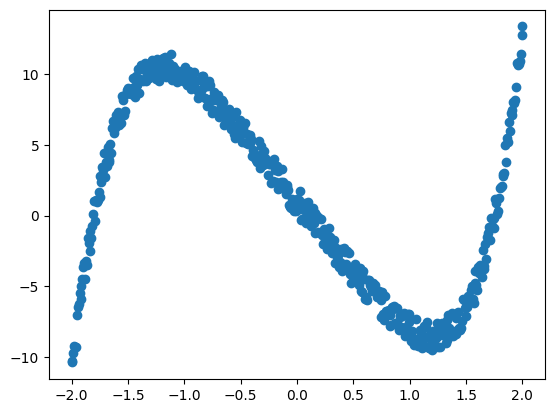

In [4]:
# Generate synthetic data
def clean_target(x):
    return x.pow(5) -10* x.pow(1)+1
def target(x):
    return x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x_train = torch.linspace(-2, 2, 500)
y_train = target(x_train)
x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

# Test model on new inputs
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

plt.scatter(x_train.data.numpy(), y_train.data.numpy())
plt.show()

MCMC Iteration 1000/5000
MCMC Iteration 2000/5000
MCMC Iteration 3000/5000
MCMC Iteration 4000/5000
MCMC Iteration 5000/5000


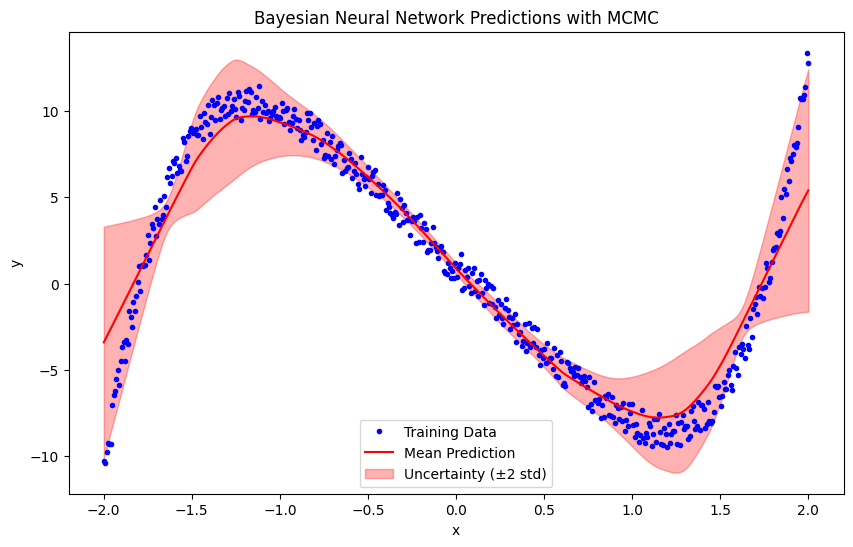

In [ ]:

# # Generate Data

# Initialize the model
model_mcmc = BayesianNN_MCMC()

# Perform MCMC Sampling
num_samples = 5000
n_burnin = 1000
samples = mcmc_sampling(model_mcmc, x_train, y_train, num_samples)

# Monte Carlo Predictions
predictions = []

for sample in samples[n_burnin:]: 
    model_mcmc.load_state_dict(sample)
    predictions.append(model_mcmc(x_test).detach())

predictions = torch.stack(predictions)
mean_prediction = predictions.mean(0)
std_prediction = predictions.std(0)

# Plot Results
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_train.numpy(), 'b.', label='Training Data')
plt.plot(x_test.numpy(), mean_prediction.numpy(), 'r-', label='Mean Prediction')
plt.fill_between(x_test.squeeze().numpy(),
                 (mean_prediction - 2 * std_prediction).squeeze().numpy(),
                 (mean_prediction + 2 * std_prediction).squeeze().numpy(),
                 color='r', alpha=0.3, label='Uncertainty (±2 std)')
plt.title('Bayesian Neural Network Predictions with MCMC')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

#### Training Bayesian Neural Networks with VI:

Bayesian Neural Networks (BNNs) extend standard neural networks by placing distributions over the weights instead of using point estimates. Variational Inference (VI) approximates the posterior distribution of these weights with a simpler distribution $ q(\theta) $.

- Given training data $ \mathcal{D} = \{(x_i, y_i)\}_{i=1}^{N} $, we define the likelihood:
  $$ p(y | x, \theta) $$
  where $ \theta $ represents the network weights.

- The posterior over weights:
  $$ p(\theta | \mathcal{D}) = \frac{p(\mathcal{D} | \theta) p(\theta)}{p(\mathcal{D})} $$

- VI approximates this with a variational posterior:
  $$ q(\theta) \approx p(\theta | \mathcal{D}) $$

- The ELBO objective is optimized:
  $$ \text{ELBO}(q) = \mathbb{E}_q[\log p(D| \theta)] - D_{KL}(q(\theta) || p(\theta)) $$

This balances likelihood maximization and prior regularization.

**KL Divergence Approximation:**

For KL Divergence Approximation we can assume prior distribution of $\theta$:

- $ q(\theta) = \mathcal{N}(\mu, \sigma^2) $ is the variational posterior,
- $ p(\theta) = \mathcal{N}(0,1) $ is the prior,
- $ \sigma $ is parameterized as $ \sigma = e^{\log\sigma} $.

$$ D_{KL}(q(\theta) || p(\theta))= D_{KL}(\mathcal{N}(\mu, \sigma^2) || \mathcal{N}(0,1))$$


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal

# PyTorch Implementation of Bayesian Neural Network with Variational Inference
class BayesianLinearVI(nn.Module):
    """
    Bayesian Linear Layer with Variational Inference.
    Each weight and bias follows a Gaussian distribution, parameterized by mean (mu) and log variance (log_sigma).
    """
    def __init__(self, in_features, out_features):
        super().__init__()
        self.in_features = in_features
        self.out_features = out_features
        
        # Mean and log variance of weights
        self.weight_mu = nn.Parameter(torch.randn(out_features, in_features))
        self.weight_sigma = nn.Parameter(torch.randn(out_features, in_features))
        
        # Mean and log variance of biases
        self.bias_mu = nn.Parameter(torch.randn(out_features))
        self.bias_sigma = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x):
        """
        Forward pass with sampling from the variational distribution.
        Uses the reparameterization trick: sampled_weight = mu + exp(log_sigma) * epsilon
        """
        weight = self.weight_mu + self.weight_sigma * torch.randn_like(self.weight_mu)
        bias = self.bias_mu + self.bias_sigma * torch.randn_like(self.bias_mu)
        return torch.matmul(x, weight.T) + bias
    

# Define Bayesian Neural Network
class BayesianNN_VI(nn.Module):
    """
    Bayesian Neural Network with Variational Inference.
    Two-layer MLP where each layer is a Bayesian linear layer.
    """
    def __init__(self):
        super().__init__()
        self.fc1 = BayesianLinearVI(1, 40) 
        self.fc2 = BayesianLinearVI(40, 40)  
        self.fc3= BayesianLinearVI(40, 1) 

    def kl_divergence(model):
        kl = 0.0
        prior = Normal(0, 1)
        for layer in model.modules():
            if isinstance(layer, BayesianLinearVI):
                q_weight = Normal(layer.weight_mu, torch.exp(layer.weight_sigma))
                q_bias = Normal(layer.bias_mu, torch.exp(layer.bias_sigma))
                kl += torch.sum(torch.distributions.kl_divergence(q_weight, prior))
                kl += torch.sum(torch.distributions.kl_divergence(q_bias, prior))
        return kl
    
    def forward(self, x):

        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)



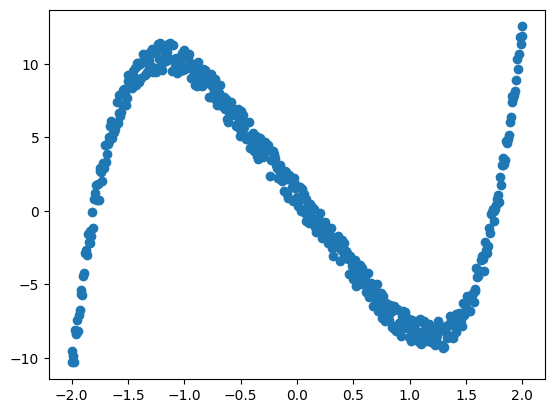

In [11]:
# Generate synthetic data
def clean_target(x):
    return x.pow(5) -10* x.pow(1)+1
def target(x):
    return x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x_train = torch.linspace(-2, 2, 500)
y_train = target(x_train)
x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

# Test model on new inputs
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

plt.scatter(x_train.data.numpy(), y_train.data.numpy())
plt.show()

Epoch 0, Loss: 874.0014, KL: 6270.6680
Epoch 1000, Loss: 81.0863, KL: 3191.4224
Epoch 2000, Loss: 52.3031, KL: 2510.6262
Epoch 3000, Loss: 42.1776, KL: 2047.1641
Epoch 4000, Loss: 29.4440, KL: 1693.0594
Epoch 5000, Loss: 18.1543, KL: 1403.5415


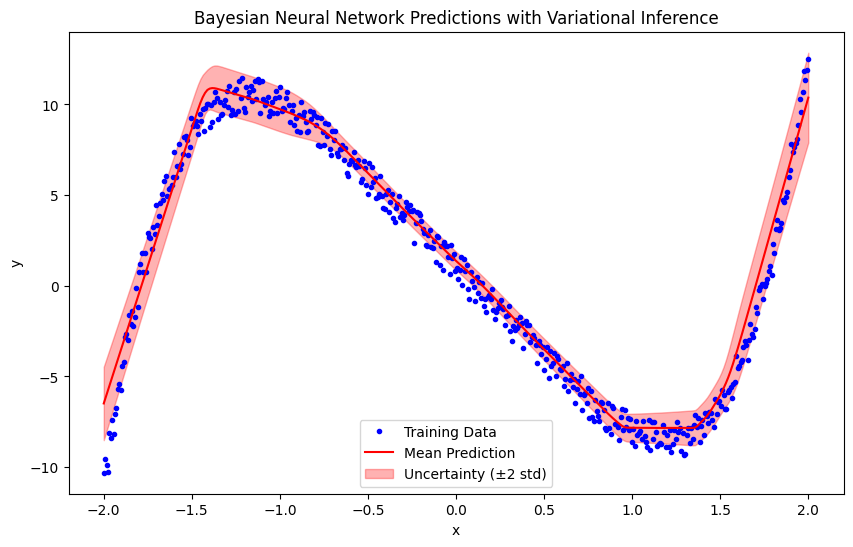

In [12]:

# Initialize Bayesian Neural Network
model_vi = BayesianNN_VI()
optimizer = optim.Adam(model_vi.parameters(), lr=0.01)  # Adam optimizer for gradient updates
loss_fn = nn.MSELoss()  # Mean Squared Error loss function

# Training the Bayesian Neural Network
for epoch in range(6000):
    optimizer.zero_grad()  # Reset gradients to zero before each update
    y_pred = model_vi(x_train)  # Forward pass
    
    # Compute ELBO:
    # ELBO = E_q[log p(D | θ)] - D_KL(q(θ) || p(θ))
    # The first term E_q[log p(D | θ)] is approximated by the MSE loss (negative log likelihood under Gaussian assumption)
    likelihood_term = loss_fn(y_pred, y_train)
    
    # Compute KL divergence between variational distribution q(θ) and prior p(θ)
    kl_divergence = model_vi.kl_divergence()
    # for param in model_vi.parameters():
    #     kl_divergence += torch.sum(0.5 * (torch.exp(2 * param) - 1 - 2 * param))
    
    # Total loss is negative ELBO
    kl_weight = 0.01
    loss = likelihood_term  + kl_weight*kl_divergence  # Scaling KL term to balance with likelihood
    loss.backward()  # Compute gradients
    optimizer.step()  # Update parameters
    
    if epoch % 1000 == 0:  # Print loss every 100 epochs
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, KL: {kl_divergence.item():.4f}")



predictions = []

# Perform multiple forward passes to capture uncertainty
for _ in range(300):
    predictions.append(model_vi(x_test).detach())

predictions = torch.stack(predictions)
mean_prediction = predictions.mean(0)  # Compute mean prediction
std_prediction = predictions.std(0)  # Compute standard deviation (uncertainty)


# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy().reshape(-1), y_train.numpy(), 'b.', label='Training Data')
plt.plot(x_test.numpy().reshape(-1), mean_prediction.numpy(), 'r-', label='Mean Prediction')
plt.fill_between(x_test.squeeze().numpy(),
                 (mean_prediction - 2 * std_prediction).squeeze().numpy(),
                 (mean_prediction + 2 * std_prediction).squeeze().numpy(),
                 color='r', alpha=0.3, label='Uncertainty (±2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Neural Network Predictions with Variational Inference')
plt.legend()
plt.show()

### Monte Carlo Dropout (MC Dropout) as Variational Inference:

![mc_drop.png](images/mc_drop.png)

ref image: Hassan MM, Ahmed D. BAYESIAN DEEP LEARNING APPLIED TO LSTM MODELS FOR PREDICTING COVID-19 CONFIRMED CASES IN IRAQ. Science Journal of University of Zakho. 2023 Apr 11;11(2):170-8.

MC Dropout is a simple yet effective approximation of Bayesian inference in neural networks.
It provides uncertainty estimation by interpreting dropout as a variational approximation to the posterior distribution over network weights.

- We introduce a dropout mask $m_i \sim Bernoulli(p)$ for each layer's activations.
- The output of a layer with dropout applied can be written as:
  $$ f_{drop}(x) = m\cdot Wx + b $$
  where $m \sim Bernoulli(p)$.
- The variational distribution $q(m\cdot W)$ is implicitly defined through the dropout mechanism.
- The objective function is the **ELBO**:
  $$ \mathbb{E}_{q(m\cdot W)} [\log p(D | m\cdot W)] - D_{KL} (q(m\cdot W) || p(m\cdot W)) $$
  where $q(m\cdot W)$ represents the approximate posterior induced by dropout.
- At inference time, MC Dropout is performed by running multiple stochastic forward passes and computing the mean and variance of predictions.



**KL Divergence Approximation:**


- In practice, the KL divergence term $D_{KL} (q(m\cdot W) || p(m\cdot W))$ is approximated using L2 regularization:
  $$ D_{KL} (q(m\cdot W) || p(m\cdot W)) \approx \lambda \sum_{i} ||W_i||^2 $$
  where $W_i$ are the weights of the network, and $\lambda$ is a small regularization coefficient.


Epoch 0, Loss: 46.8772, KL: 0.0041
Epoch 1000, Loss: 1.9623, KL: 0.0643


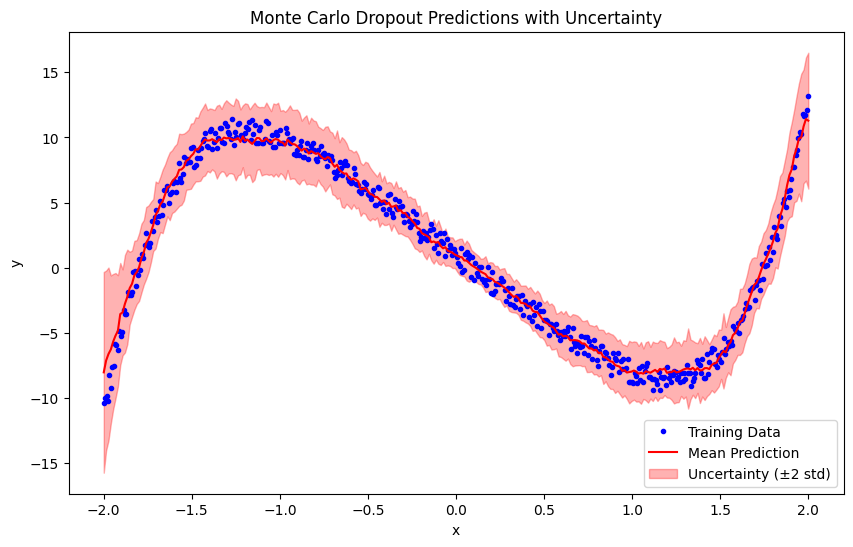

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.distributions import Normal

# Define Monte Carlo Dropout Neural Network
class MCDropoutNN(nn.Module):
    """
    Monte Carlo Dropout Neural Network.
    Dropout layers are applied in both training and inference to approximate Bayesian inference.
    """
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1, 40)
        self.dropout = nn.Dropout(p=0.2)  # Dropout applied to activations
        self.fc2 = nn.Linear(40, 40)
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(40, 1)
    
    def forward(self, x):
        """
        Forward pass through the network with dropout.
        Dropout remains active even during inference to enable Monte Carlo sampling.
        """
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # Dropout is active in training and inference
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        return self.fc3(x)

# Generate synthetic data

def clean_target(x):
    return x.pow(5) -10* x.pow(1)+1
def target(x):
    return x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x_train = torch.linspace(-2, 2, 500)
y_train = target(x_train)
x_train = torch.unsqueeze(x_train, dim=1)
y_train = torch.unsqueeze(y_train, dim=1)

# Test model on new inputs
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)



# Initialize MC Dropout model
model_mc_dropout = MCDropoutNN()
optimizer = optim.Adam(model_mc_dropout.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Training the MC Dropout Model
for epoch in range(2000):
    optimizer.zero_grad()
    y_pred = model_mc_dropout(x_train)  # Forward pass with dropout
    
    # Compute ELBO:
    # ELBO = E_q[log p(D | W)] - D_KL(q(W) || p(W))
    # The first term E_q[log p(D | W)] is approximated by the MSE loss (negative log-likelihood under Gaussian assumption)
    likelihood_term = loss_fn(y_pred, y_train)
    
    # Compute KL divergence term (L2 weight regularization as an approximation)
    kl_divergence = sum(torch.sum(param**2) for param in model_mc_dropout.parameters()) * 0.0001  # Weight decay as KL term
    
    # Total loss is negative ELBO
    loss = likelihood_term + kl_divergence  # Minimize negative ELBO
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}, KL: {kl_divergence.item():.4f}")

# Test model with Monte Carlo Dropout
predictions = []

# Perform multiple stochastic forward passes
for _ in range(100):  # 100 Monte Carlo samples
    predictions.append(model_mc_dropout(x_test).detach())

predictions = torch.stack(predictions)
mean_prediction = predictions.mean(0)  # Compute mean prediction
std_prediction = predictions.std(0)  # Compute standard deviation (uncertainty)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x_train.numpy(), y_train.numpy(), 'b.', label='Training Data')
plt.plot(x_test.numpy(), mean_prediction.numpy(), 'r-', label='Mean Prediction')
plt.fill_between(x_test.squeeze().numpy(),
                 (mean_prediction - 2 * std_prediction).squeeze().numpy(),
                 (mean_prediction + 2 * std_prediction).squeeze().numpy(),
                 color='r', alpha=0.3, label='Uncertainty (±2 std)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Monte Carlo Dropout Predictions with Uncertainty')
plt.legend()
plt.show()


# Probabilistic programming Tools


#### 1. Pyro

https://github.com/pyro-ppl/pyro

<img src="images/pyro.png" alt="drawing" width="200"/>

**Pyro** is a probabilistic programming language built on Python and **PyTorch**. Pyro programs are just Python programs, while its main inference technology is **stochastic variational inference**, which converts abstract probabilistic computations into concrete optimization problems solved with **stochastic gradient descent** in **PyTorch**, making probabilistic methods applicable to previously intractable model and dataset sizes.

#### 2. NumPyro

https://github.com/pyro-ppl/numpyro

NumPyro is a lightweight probabilistic programming library that provides a NumPy backend for Pyro. We rely on JAX for automatic differentiation and JIT compilation to GPU / CPU. NumPyro is under active development, so beware of brittleness, bugs, and changes to the API as the design evolves.

#### 3. PyMC

https://github.com/pymc-devs/pymc

<img src="images/pymc.png" alt="drawing" width="200"/>

PyMC is a probabilistic programming library designed for Bayesian inference. It is built on top of PyTensor (Therano fork) with can integrate with backend such as JAX and Numba.

#### 4. Tensorflow Probability

https://github.com/tensorflow/probability

TensorFlow Probability is a library for probabilistic reasoning and statistical analysis in TensorFlow. As part of the TensorFlow ecosystem, TensorFlow Probability provides integration of probabilistic methods with deep networks, gradient-based inference via automatic differentiation, and scalability to large datasets and models via hardware acceleration (e.g., GPUs) and distributed computation.